In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
%env OPENAI_API_KEY=<Enter you key here>

In [ ]:
from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.imgeEdit import PROMPT

In [ ]:
interpreter = ProgramInterpreter(dataset='imageEdit')

In [ ]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt)

In [ ]:
image = Image.open('../assets/tree.jpg')

image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [17]:
# instruction = "Select person Benedict Cumberbatch and Martin Freeman, and blur"
# instruction = "Select the door-stuff, and blur"
# instruction = "Select the man with brown hat, and blur"
# instruction = "Select black hat person and brown hat person, and blur"
# instruction = "Select male lead characters from Sherlock homes series and blur the background"
# instruction = "Select Daniel Radcliffe and blur the background"
# instruction = "Select lead character from Harry Potter and blur the background"
# instruction = "Select person Timothée Chalamet, and blur the background"
# instruction = "Select the tree and blur the background"
instruction = "Select sky and tree, and blur"
# instruction = "Select person wearing white suit and blur"
# instruction = "Select right girl and ground, and blur the background"
# instruction = "Select tree and road, and blur background"
# instruction = "Select man with black hat and blur the background"
# instruction = "Select person wearing gray hood, and blur"
# instruction = "Blur truck and flower"
# instruction = "Select tree, sky and blur"
# instruction = "Blur blue road sign"
prog,_ = generator.generate(instruction)
print(prog)

OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='wearing gray hood',category='person')
IMAGE0=REMOVEBG(image=IMAGE,object=OBJ1)
FINAL_RESULT=RESULT(var=IMAGE0)


In [18]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

In [19]:
result
result.save("../result/Blur_Image.jpg")


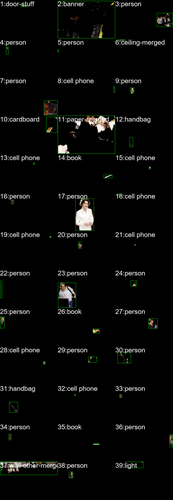
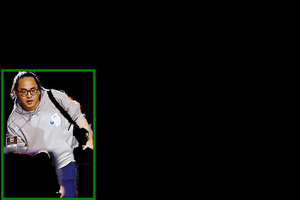
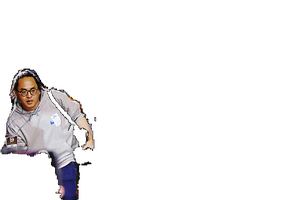
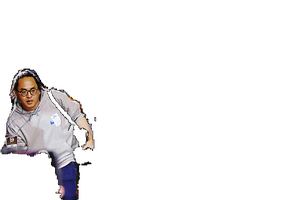

In [20]:
HTML(html_str)